# EVN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [5]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [6]:
words = []
for sentence in sentences:
  words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [7]:
dict.fromkeys(words)

{'기분이': None, '나는': None, '오늘': None, '우울해': None, '좋아': None}

In [9]:
#중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [10]:
# 각 단어별 고유한 번호 부여
word_to_id = {'{PAD}' : 0, '{UNK}' : 1} # PAD 길이를 조절할 때, UNK vocab에 없는 단어
for word in words:
  word_to_id[word] = len(word_to_id)
word_to_id

{'{PAD}': 0, '{UNK}': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [11]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '{PAD}', 1: '{UNK}', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [12]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
  train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [13]:
# 문장의 길이를 모두 동일하게 변경(최대 길이 4)
for row in train_inputs:
  row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [14]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [15]:
# train label은 labels를 그대로 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [16]:
# 정답 길이를 모두 동일하게 변경(최대 길이 4)
for row in train_labels:
  row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [17]:
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [18]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8) # len(word_to_id)는 n_vocab (vocab의 개수), 8은 d_model (차원 수 = 벡터의 크기)
hidden = embedding(train_inputs) # embedding 함수는 단어를 밀집 벡터, 인공 신경망 용어로는 embedding layer를 만들어줌
train_inputs.shape, hidden  # shape는 행렬의 차원을 말함 -> (2, 4, 8)

((2, 4), <tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
 array([[[-5.36330044e-05, -5.22132963e-03,  4.54543903e-03,
           8.03623348e-03, -1.24964826e-02,  1.78958438e-02,
           2.17167400e-02, -4.66305725e-02],
         [ 3.10835280e-02,  4.09057029e-02,  1.35798343e-02,
          -4.45928350e-02,  4.68729809e-03,  2.86296941e-02,
           2.83477195e-02,  1.56780370e-02],
         [-2.56265998e-02,  3.48286144e-02, -2.98504718e-02,
           4.51670177e-02, -2.58978494e-02,  4.43489440e-02,
          -3.08150053e-03, -4.92602363e-02],
         [ 1.76559575e-02, -4.56690677e-02,  2.01023705e-02,
          -9.88107920e-03, -3.35087925e-02, -7.05989450e-03,
          -4.26713713e-02, -1.00763217e-02]],
 
        [[-5.36330044e-05, -5.22132963e-03,  4.54543903e-03,
           8.03623348e-03, -1.24964826e-02,  1.78958438e-02,
           2.17167400e-02, -4.66305725e-02],
         [ 3.10835280e-02,  4.09057029e-02,  1.35798343e-02,
          -4.45928350e-02,  4.68729809e-0

In [19]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률 값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)

'''
Dense()의 인자
첫번째 인자 : 출력 뉴런의 수
input_dim : 입력의 차원
action : 활성화 함수
  -> softmax : 셋 이상을 분류하는 다중 클래스 분류에서 출력 층에 주로 사용되는 활성화 함수.
  -> relu : 은닉층에 사용되는 활성화 함수
'''

outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.3377648 , 0.32247755, 0.3397576 ],
        [0.33137712, 0.3274897 , 0.34113318],
        [0.33397496, 0.33824423, 0.3277808 ],
        [0.33813283, 0.32804072, 0.33382642]],

       [[0.3377648 , 0.32247755, 0.3397576 ],
        [0.33137712, 0.3274897 , 0.34113318],
        [0.32872564, 0.34515953, 0.32611483],
        [0.33914343, 0.3260069 , 0.33484972]]], dtype=float32)>

In [20]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률 값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[-0.0036739 , -0.00057279, -0.02040835],
        [ 0.05292372, -0.0313866 ,  0.00895505],
        [-0.07881499, -0.01801766,  0.04772645],
        [ 0.04483048,  0.04499085,  0.00772572]],

       [[-0.0036739 , -0.00057279, -0.02040835],
        [ 0.05292372, -0.0313866 ,  0.00895505],
        [-0.04022014,  0.05593276,  0.00101277],
        [-0.02729268, -0.02188898,  0.02077731]]], dtype=float32)>

In [21]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis = 2, keepdims = True)
numerator, denominator

(array([[[0.9963328 , 0.9994274 , 0.97979844],
         [1.0543493 , 0.9691009 , 1.0089953 ],
         [0.9242109 , 0.9821437 , 1.0488837 ],
         [1.0458505 , 1.0460182 , 1.0077556 ]],
 
        [[0.9963328 , 0.9994274 , 0.97979844],
         [1.0543493 , 0.9691009 , 1.0089953 ],
         [0.96057796, 1.0575265 , 1.0010133 ],
         [0.9730764 , 0.97834885, 1.0209945 ]]], dtype=float32),
 array([[[2.9755588],
         [3.0324454],
         [2.9552383],
         [3.0996246]],
 
        [[2.9755588],
         [3.0324454],
         [3.0191178],
         [2.9724197]]], dtype=float32))

In [22]:
# 두 결과값 비교
probs = numerator / denominator
probs

array([[[0.3348389 , 0.33587888, 0.32928216],
        [0.34768945, 0.31957737, 0.3327332 ],
        [0.3127365 , 0.33233994, 0.35492355],
        [0.337412  , 0.3374661 , 0.32512182]],

       [[0.3348389 , 0.33587888, 0.32928216],
        [0.34768945, 0.31957737, 0.3327332 ],
        [0.31816512, 0.35027665, 0.3315582 ],
        [0.32736844, 0.3291422 , 0.34348935]]], dtype=float32)

In [23]:
# dense의 weight, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[ 0.57444733,  0.49864477, -0.10146636],
        [-0.5727428 , -0.12239057,  0.49001676],
        [ 0.5136675 ,  0.42642242,  0.05172604],
        [-0.552088  ,  0.60429865,  0.3471858 ],
        [-0.6473983 , -0.7106409 , -0.6362407 ],
        [ 0.22559589, -0.6498228 ,  0.5518698 ],
        [ 0.50145   , -0.01533478, -0.53262407],
        [ 0.5907926 ,  0.10503858,  0.582033  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [24]:
logits = np.matmul(hidden, weight)
logits

array([[[-0.0036739 , -0.00057279, -0.02040835],
        [ 0.05292372, -0.0313866 ,  0.00895505],
        [-0.07881499, -0.01801766,  0.04772645],
        [ 0.04483048,  0.04499085,  0.00772572]],

       [[-0.0036739 , -0.00057279, -0.02040835],
        [ 0.05292372, -0.0313866 ,  0.00895505],
        [-0.04022014,  0.05593276,  0.00101277],
        [-0.02729268, -0.02188898,  0.02077731]]], dtype=float32)

In [27]:
def build_model(n_vocab, d_model, n_seq, n_out): # n_seq : 입력 갯수
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)

    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

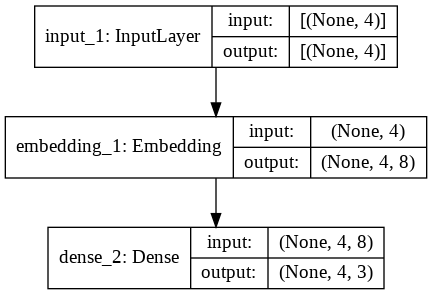

In [26]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [28]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 722ms/step - loss: 1.1113 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1081 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1049 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1017 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0985 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0954 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0922 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0890 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0859 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0827 - accuracy: 0.6250
Epoch 11/10

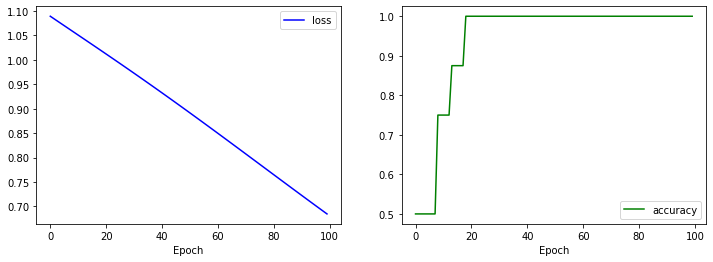

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [ ]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 138ms/step - loss: 0.6804 - accuracy: 1.0000


[0.6804076433181763, 1.0]

## 예측

In [ ]:
# 추론할 입력
string = "나는 기분이 우울해"

In [ ]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [ ]:
# 문장의 길이를 모두 동일하게 변경(최대 길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [ ]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [ ]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds


array([[[0.23677728, 0.53150266, 0.23172006],
        [0.24960567, 0.54088   , 0.20951435],
        [0.41122767, 0.27496237, 0.31380996],
        [0.23558529, 0.554294  , 0.21012072]]], dtype=float32)

In [ ]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])